# 🚀 Kaggle Competition Entry: Enhanced Bank Customer Churn Prediction ❤️

## Overview
In this competition, we are tasked with predicting bank customer churn based on a unique dataset. This dataset has been synthetically generated by a deep learning model, which was initially trained on the original Bank Customer Churn Prediction dataset. While the features mirror the original to a degree, subtle differences exist that may influence model predictions.

## Objective
The challenge is to not only develop a predictive model with high accuracy for customer churn but also to identify and leverage the nuances between the synthetic and original datasets. Competitors are encouraged to explore the original dataset alongside the provided one, examining the disparities and potentially utilizing it to enhance model robustness and performance.

## Strategy
My approach will involve a thorough exploratory data analysis to compare the synthetic and original datasets, hypothesis testing to understand feature relationships, and experimenting with various machine learning algorithms. The goal is to create a model that not only excels with the competition data but also gains insights from the original dataset to improve prediction outcomes.

---

Good luck to all participants — may the best model win!

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


The following function `print_heading` is used only for the purpose of printing headings text surrounded by lines to make the output look more readable.

In [29]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading.upper())
    print('-' * 50)

## Load Dataset

Leveraging the synergy of both the original Bank Customer Churn Prediction dataset and the provided synthetic training data, as encouraged, to potentially enhance model accuracy and generalization.

In [30]:
df = pd.read_csv("../projects/data/train.csv")
main = pd.read_csv("../projects/data/main.csv")

# 1.0. Dataset Inspection

In [31]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Data Types in the Dataset

| DataType | Count |
|----------|-------|
| int64    | 6     |
| float64  | 5     |
| object   | 3     |



## Shape of the Data
The dataset consists of records for 165,034 customers, each with 14 features. Below is the summary of the dataset dimensions:

| Description | Count |
|-------------|-------|
| Customers   | 165034|
| Features    | 14    |

## List all columns

In [43]:
# print the columns as a list
print_heading("Columns")

for col in main.columns:
    print(f"- {col}")


--------------------------------------------------
COLUMNS
--------------------------------------------------
- RowNumber
- CustomerId
- Surname
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited


# Dataset Summary Information

In [52]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Observation
- **CreditScore**: The average credit score in the dataset is approximately `656`, with a standard deviation of around `80`. The scores range from a minimum of `350` to a maximum of `850`, which suggests a wide variety of creditworthiness among the customers.

- **Age**: Customers have an average age of about `38 years` with a standard deviation of nearly `9 years`, indicating moderate age diversity. The age range is from `18 to 92 years`, showing that the dataset includes young adults to seniors.

- **Balance**: The mean account balance is about `55,478`, but with a large standard deviation of approximately `62,818`, indicating significant variability in customer balances. Notably, `25%` of customers have a balance of `0`, which could indicate a segment of customers that do not use their accounts actively.

- **Exited**: Approximately `21%` of customers have exited (the `Exited` column has a mean of `0.21`), pointing towards a churn rate that could be of interest for retention strategies. This is a binary variable, with `0` representing the customer has not exited and `1` representing the customer has exited.

# Inspecting Labels of Categorical Variables

In [56]:
# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
# drop Surname feature from cat
categorical_variables = categorical_variables.drop('Surname')
value_counts_dict = {}

# Get the value count 
for variable in categorical_variables:
    value_counts_dict[variable] = df[variable].value_counts()

# Initialize an empty list to store the data
data_list = []

# Append a tuple to the list for each category
for variable, counts in value_counts_dict.items():
    for category, count in counts.items():
        data_list.append((variable, category, count))
        
# Append an empty tuple to create a gap between variables
    data_list.append(("---", "---", "---"))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Make the variable column as an index
value_counts_df = value_counts_df.set_index('Variable')

# Display the DataFrame
value_counts_df

,Category,Count
Variable,,
Geography,France,94215
Geography,Spain,36213
Geography,Germany,34606
---,---,---
Gender,Male,93150
Gender,Female,71884
---,---,---


# Observations
* **Geographic Distribution:** There is a significant imbalance in the geographic distribution of the dataset. France has the highest representation with `94,215` entries, which is substantially more than Spain and Germany, with `36,213` and `34,606` entries respectively.

* **Gender Distribution:** The dataset shows an imbalance in gender with more `males (93,150)` than females `(71,884)`. However, the disparity is not as pronounced as it is in the geographic distribution.


# Inspecting Labels of Target Variable

In [58]:
exited_df = df['Exited'].value_counts()
pd.DataFrame(exited_df)

,count
Exited,
0,130113
1,34921


# Observations
* **Retention Rate:** The majority of the customers in the dataset have not exited, with `130,113` customers still with the bank. This suggests that the bank has a strong retention rate overall.

* **Churn Rate**: There are `34,921` customers who have exited, which indicates that there is a churn issue that the bank could potentially address. While the number of customers remaining with the bank is higher, the churn rate is still significant.

* **Customer Insights:** The data on churn could be further analyzed to understand why these customers are leaving. Insights from this analysis could inform retention strategies.

* **Improvement Opportunity:** The bank has an opportunity to improve its churn rate by identifying the factors that contribute to customer exit and addressing them. This could involve looking at customer service, pricing, product offerings, and other aspects that impact customer satisfaction and loyalty.

# Correlation Matrix

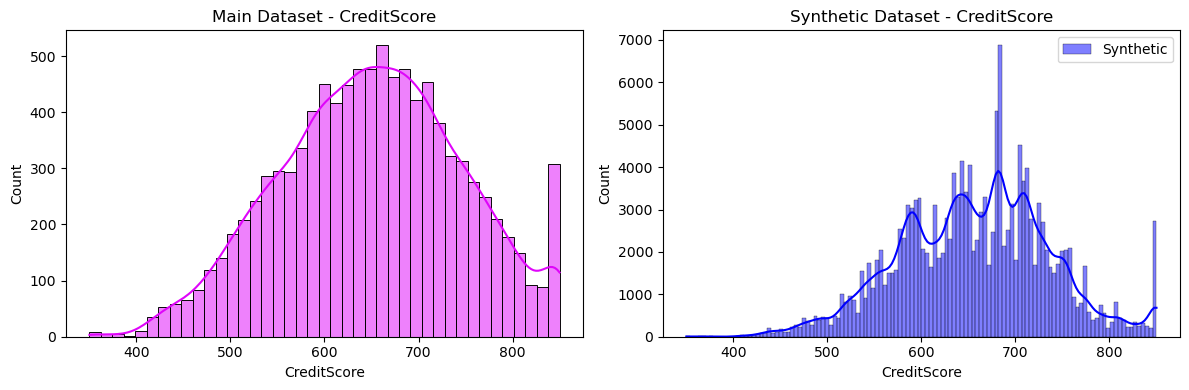

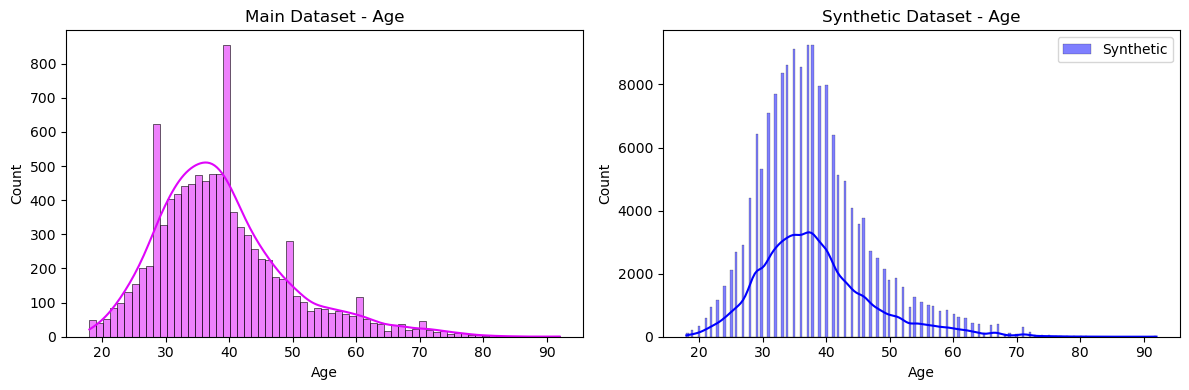

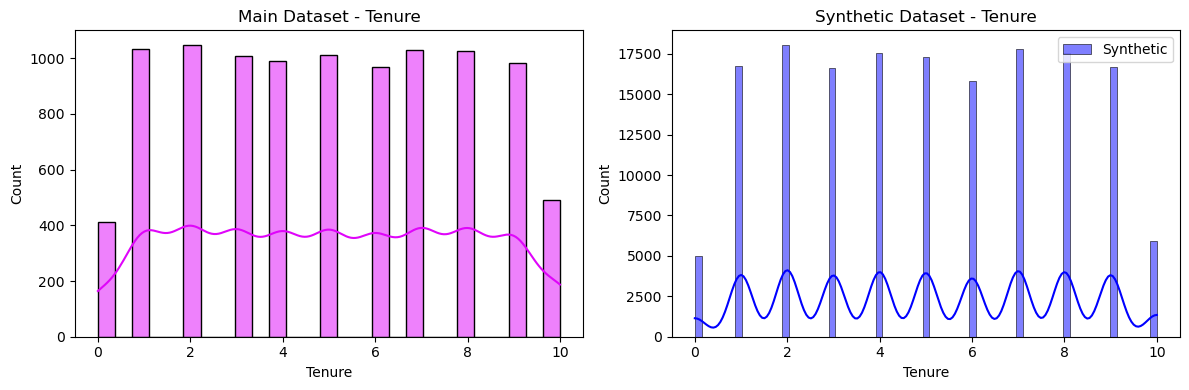

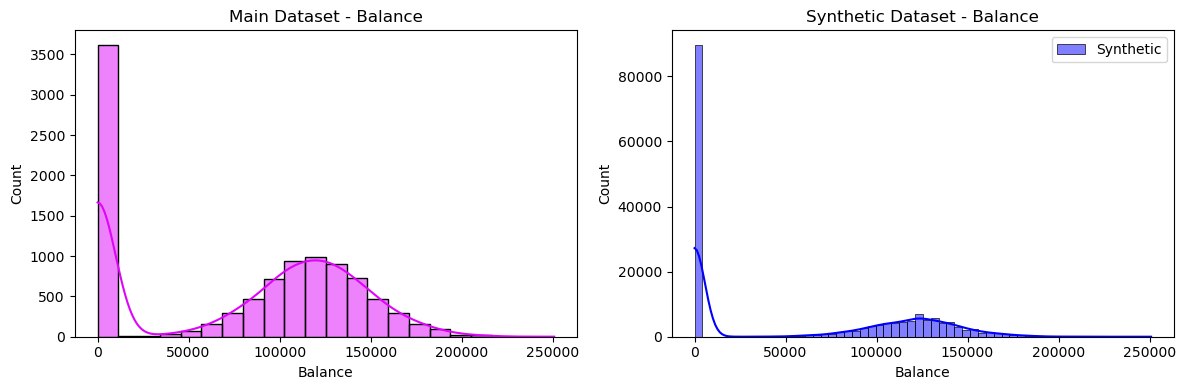

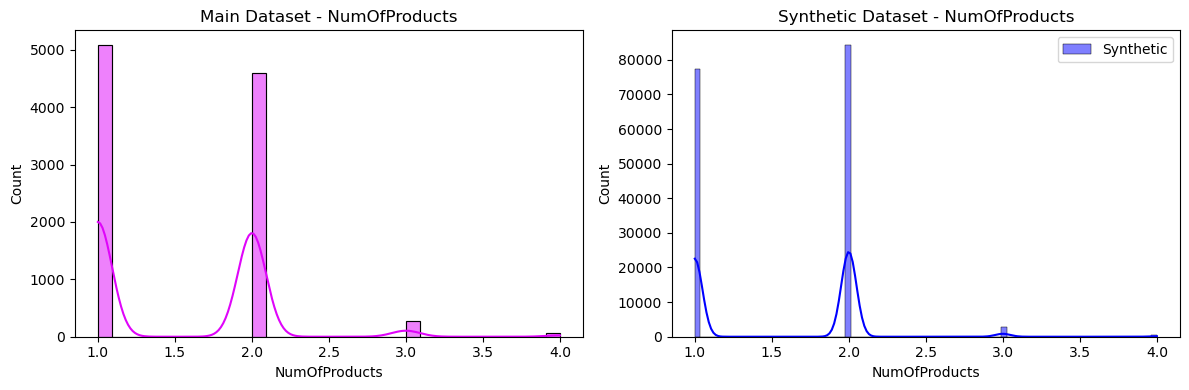

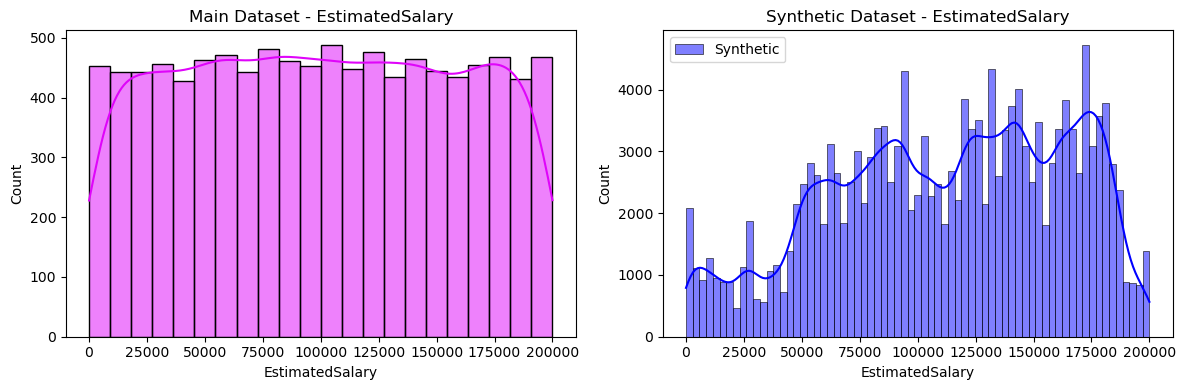

In [53]:
# Visualizations
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in features:
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    sns.histplot(main[feature], kde=True, color='#df05fa', label='Main')
    plt.title(f'Main Dataset - {feature}')
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[feature], kde=True, color='#0000ff', label='Synthetic')
    plt.title(f'Synthetic Dataset - {feature}')
    
    plt.tight_layout()
    plt.legend()
    plt.show()